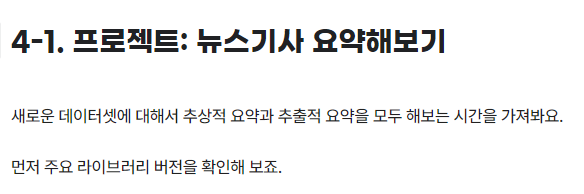

In [5]:
#라이브러리 불러오기
from importlib.metadata import version
import nltk
import tensorflow as tf
import summa
import pandas as pd

print(nltk.__version__)
print(tf.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


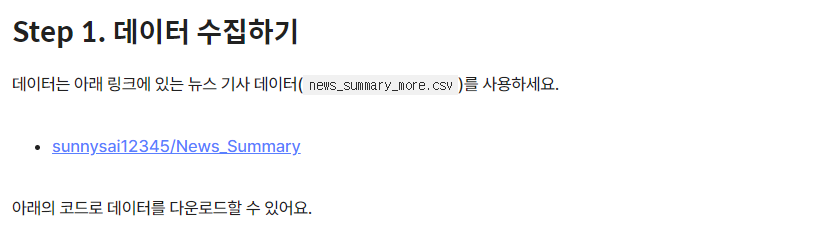
https://github.com/sunnysai12345/News_Summary

In [6]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [7]:
data.sample(10)

,headlines,text
20382,15-yr-old UP girl commits suicide days after b...,A 15-year-old girl committed suicide at her ho...
78896,War veteran who survived WWII attends Dunkirk'...,"Ken Sturdy, a 97-year-old war veteran who surv..."
57697,I believe strongly in freedoms: Apple CEO Tim ...,"Talking about China's Internet policy, Apple C..."
70707,Karnataka CM blames previous BJP government fo...,Karnataka CM Siddaramaiah has alleged that mis...
62050,Lee only bowler with hat-trick in World Cup of...,Ex-Australian pacer Brett Lee is the only bowl...
24003,Watch live the longest total lunar eclipse of ...,The longest total lunar eclipse of the 21st ce...
85408,"Why was Sanjay Dutt released early, HC asks Ma...",The Bombay High Court on Monday asked the Maha...
64737,India's 1st Moon mission was launched 9 yrs ag...,India's first-ever mission to Moon 'Chandrayaa...
49633,"Shahid, Mira walk the ramp for Dongre at LakmÃ...",Actor Shahid Kapoor and his wife Mira Rajput t...
22774,Roadies creator Raghu Ram gets engaged to sing...,Television reality show MTV Roadies creator Ra...


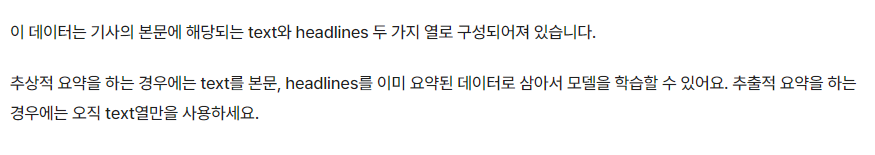

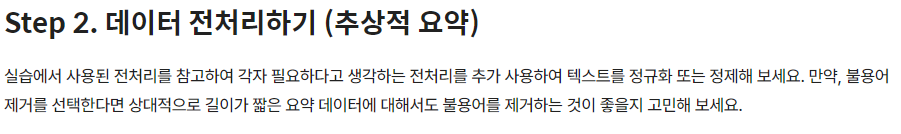

In [8]:
#데이터 디렉토리에 저장하기
# mkdir -p ~/aiffel/news_summary/data
# !ln -s ~/data/*.csv ~/aiffel/news_summary/data
# import os
# os.makedirs(os.path.expanduser('~/aiffel/news_summary/data'), exist_ok=True)


# print(os.getcwd())

In [9]:
#전체샘플수확인
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [10]:
#데이터 샘플확인 상위데이터 5개만
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [11]:
#데이터 정리하기
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [12]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [13]:
# 중복값제거후 결측치확인
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [14]:
#정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [15]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#NLTK에서 미리 정의하고있는 불용어 개수알아보기및 불러오기
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [17]:
#데이터 전처리 함수 구현(모든 영어문자는 소문자로 만들고, 섞여있는 HTML태그를 제거, 정규표현식을 통해 각종 특수문자를 제거)
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('OK')

OK


In [18]:
#text 데이터 전처리

clean_text = []
clean_text =data['text'].apply(preprocess_sentence)

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  0    saurav kant alumnus upgrad iiit pg program mac...
1    kunal shah credit card bill payment platform c...
2    new zealand defeated india wickets fourth odi ...
3    aegon life iterm insurance plan customers enjo...
4    speaking sexual harassment allegations rajkuma...
Name: text, dtype: object


In [19]:
#headlines 데이터 전처리(headlines데이터는 상대적으로 문장 길이가 짧기때문에 요약데이터는 불용어 제거안함)
clean_headlines = []
clean_headlines =data['headlines'].apply(lambda x: preprocess_sentence(x, remove_stopwords=False))

# 전처리 후 출력
print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  0    upgrad learner switches to career in ml al wit...
1    delhi techie wins free food from swiggy for on...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan helps customer...
4    have known hirani for yrs what if metoo claims...
Name: headlines, dtype: object


In [20]:
#전처리한 데이터를 다시 해당 컬럼에 할당
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('ok')

ok


In [21]:
#null값으로 바꼈는지 확인
#null값 확인
data.isnull().sum()
# data.isna().sum()

headlines    0
text         0
dtype: int64

In [22]:
#data.dropna(axis=0, inplace=True) null값이 없으니 제거할필요 없음
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


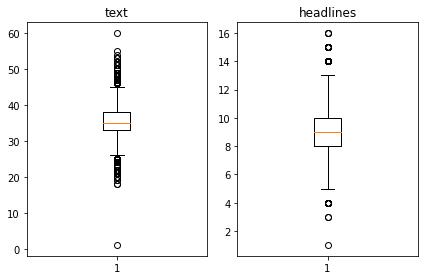

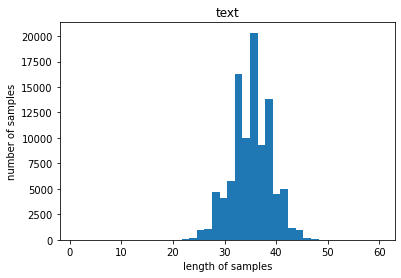

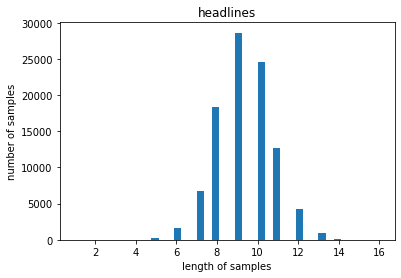

In [23]:
#데아터 전처리하기, 훈련데이터와 테스트데이터 나누기
#훈련에 사용할 샘플의 최대길이 정하기
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [24]:
#그래프를보고 임의로 최대길이 설정
text_max_len = 45
headlines_max_len = 12

In [25]:
#최대길이 설정시 데이터의 어느정도 포함되는지 확인하는 함수 구현
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('ok')

ok


In [26]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 45 이하인 샘플의 비율: 0.9967771451809678
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880337535583571


In [27]:
#샘플의 비율을 확인했으니 이제 text와 headlines를 담고있는 데이터프레임에서 설정한 길이보다 긴 샘플은 제외
data1 = data.copy()#원본데이터 혹시몰라 카피
data1 = data1[(data1['text'].apply(lambda x: len(x.split()) <= text_max_len)) &
                     (data1['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len))]
#x.split()을 사용한이유: 문자열의 전체길이가아니라 단어의 수에따라 제한을두기때문
# data1 = data1[data1['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data1)))

#처음에 98360->96871로 데이터 개수 줌 하지만 샘플의 비율은 둘다 99퍼로 망가지지않고 유지

전체 샘플수 : 96871


In [28]:
#요약 데이터에서 시작토큰과 종료 토큰을 추가한다.
#모델이 입력을 받아 요약할때 언제 시작해서 언제끝나는지 알려줘야하기때문

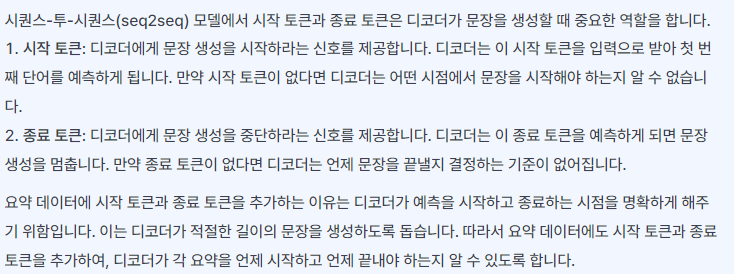

In [29]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
#앞뒤로 토큰이 잘 붙은것을 확인
data1['decoder_input'] = data1['headlines'].apply(lambda x : 'sostoken '+ x)
data1['decoder_target'] = data1['headlines'].apply(lambda x : x + ' eostoken')
data1.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...


In [30]:
# 디코더의 입력과 레이블을 각각 다시 numpy타입으로 저장
encoder_input = np.array(data1['text']) # 인코더의 입력
decoder_input = np.array(data1['decoder_input']) # 디코더의 입력
decoder_target = np.array(data1['decoder_target']) # 디코더의 레이블
print('ok')

ok


In [31]:
#훈련데이터와 테스트데티어 분리(encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어주기)
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)


[12991 13207 51012 ... 28113 10605 26628]


In [32]:
# 위에서 정의한 정수 시퀀스를 사용하여 데이터 샘플순서를 섞어 잘 섞인 샘픙을 만들어준다.
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('ok')

ok


In [33]:
#테스트 데이터 정의
n_of_val = int(len(encoder_input)*0.2) #전체 데이터 encoder_input의20퍼정도만 테스트데이터로 사용)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19374


In [34]:
#위에서 정의한 테스트 데이터의 개수를 이용해 슬라이싱으로 전체데이터 나누어주기(8:2로)
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 77497
훈련 레이블의 개수 : 77497
테스트 데이터의 개수 : 19374
테스트 레이블의 개수 : 19374


In [35]:
# 데이터 전처리하기 정수인코딩
# 텍스트를 숫자로 처리할수있도록 데이터의 단어들을 모두 정수로 바꾼다.
#단어집합(vocabulary)를 만든다.
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
#신경망 모델에 넣기위해 인코더 데이터를 토큰화로 잘게 나눈후에 인덱스를 부여하여 시퀀스형태로 만듬
print('ok')
#훈련데이터에 대해 단어집합이 생성되는 동시에 각 단어에 고유한 정수가 부여됨
#자연어처리에서 각각 데이터에 대한 단어를 토큰화로 나눈후 정수화시킨다. 단어사전은 각 토큰화된 단어에 대한 레이블

ok


In [36]:
#임계값을 임의로 7로 정하여 등장빈도수가 임계값7미만인 단어들은 얼마나되는지확인

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 68980
등장 빈도가 6번 이하인 희귀 단어의 수: 46946
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22034
단어 집합에서 희귀 단어의 비율: 68.0574079443317
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.5026673726186535


In [37]:
# 등장빈도가 임계값 7회 미만인 단어들은 단어집합에서 68퍼를 차지하지만 실제로 훈련데이터에서 등장빈도는 적은수치인 3퍼기때문에 
#정수인코딩에서 빼고, 훈련데이터에서 제거
#위에서 제거시킬경우 단어집합의 크기가 약20000임으로 집합의크기를 20000으로 제한
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 20000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('ok')

ok


In [38]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[2074, 61, 15864, 6914, 48, 479, 273, 231, 11161, 86, 225, 356, 2589, 625, 7807, 1836, 539, 61, 2074, 6423, 5534, 11161, 283, 267, 172, 37, 11738, 14672, 3630, 22, 1, 274, 1553, 1068, 192, 6344, 26], [8, 857, 5212, 19, 115, 7, 221, 299, 252, 1943, 139, 1170, 2, 327, 1669, 2214, 1692, 872, 8, 1, 139, 5213, 7063, 192, 1827, 959, 6, 1, 141, 99, 7064, 1351, 670, 14169], [216, 1189, 61, 90, 8313, 10157, 863, 1099, 1302, 8755, 22, 1, 1478, 2104, 4455, 4742, 24, 1479, 113, 6, 55, 4052, 1231, 4742, 65, 11739, 1491, 3, 13, 6, 1644, 602, 10, 8934]]


In [39]:
#훈련데이터에 대해 정수인코딩과정이 완료된것을 알수있음
#테스트데이터도 위와 동일하게 정수인코딩과정진행
#테스트데이터에대한 단어집합이 생성되는 동시에 각 단어에 고유한 정수가 부여됨
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('ok')

ok


In [40]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29831
등장 빈도가 5번 이하인 희귀 단어의 수: 19507
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10324
단어 집합에서 희귀 단어의 비율: 65.39170661392511
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.699400033737088


In [41]:
#단어집합에서 5회이하인 단어들 제외시킴
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 3203, 209, 4, 302, 4358, 2883, 4486, 38, 212], [1, 9, 3761, 4, 395, 1437, 3967, 23, 551, 34], [1, 3968, 242, 90, 1611, 210, 113, 1312], [1, 269, 142, 6, 6765, 64, 68, 1094, 5368, 15, 32], [1, 422, 95, 1638, 2944, 1539, 3, 803, 2106, 1932]]
target
decoder  [[3203, 209, 4, 302, 4358, 2883, 4486, 38, 212, 2], [9, 3761, 4, 395, 1437, 3967, 23, 551, 34, 2], [3968, 242, 90, 1611, 210, 113, 1312, 2], [269, 142, 6, 6765, 64, 68, 1094, 5368, 15, 32, 2], [422, 95, 1638, 2944, 1539, 3, 803, 2106, 1932, 2]]


In [42]:
#아까 요약데이터에 sostoken과 eostoken이 추가된샘플중 추가한토큰을 제외할경우 0인요약본을 제거
#sostoken과eostoken이 디코더에 다 추가하였기때문에 비중이높아 요약본이0이어도 제거가 안되어있을수있음
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 77497
훈련 레이블의 개수 : 77497
테스트 데이터의 개수 : 19374
테스트 레이블의 개수 : 19374


In [43]:
#패딩하기
#텍스트 시퀀스를 정수시퀀스로 변환후 서로다른길이의 샘플들을 병렬처리하기위해 같은 길이로 맞추어주는 패딩작업을 진행
#아까 지정했던 최대길이로 패딩, 최대길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대길이로 맞추어준다.
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')
print('ok')

ok


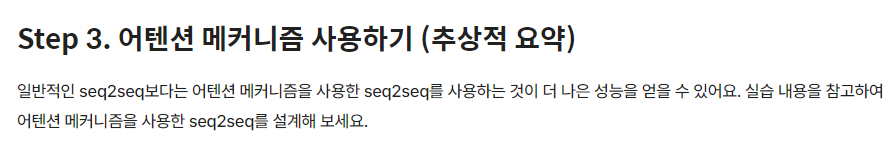

In [44]:
#모델 설계하기
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

In [45]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [46]:
#어텐션 메커니즘
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [47]:
#모델 컴파일
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
303/303 [==============================] - 64s 95ms/step - loss: 5.6203 - val_loss: 5.1717
Epoch 2/50
303/303 [==============================] - 28s 93ms/step - loss: 5.0155 - val_loss: 4.7914
Epoch 3/50
303/303 [==============================] - 29s 96ms/step - loss: 4.6994 - val_loss: 4.5497
Epoch 4/50
303/303 [==============================] - 29s 97ms/step - loss: 4.4451 - val_loss: 4.3508
Epoch 5/50
303/303 [==============================] - 29s 96ms/step - loss: 4.2363 - val_loss: 4.2180
Epoch 6/50
303/303 [==============================] - 30s 97ms/step - loss: 4.0624 - val_loss: 4.0980
Epoch 7/50
303/303 [==============================] - 29s 97ms/step - loss: 3.9096 - val_loss: 4.0006
Epoch 8/50
303/303 [==============================] - 30s 99ms/step - loss: 3.7771 - val_loss: 3.9294
Epoch 9/50
303/303 [==============================] - 30s 98ms/step - loss: 3.6608 - val_loss: 3.8714
Epoch 10/50
303/303 [==============================] - 30s 99ms/step - loss: 3.560

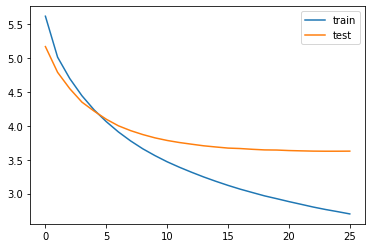

In [48]:
#loss값에따른 그래프 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [49]:
#인퍼런스 모델 구현하기
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('ok')

ok


In [50]:
#seq2seq는 훈련할때와 실제 동작할때(인퍼런스 단계의 방식이 다르므로 그에맞게 모델설계를 해주어야한다.)
#훈련단계에서는 디코더의 입력부에 정답이 되는 문장전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할수있으므로, 인코더와 디코더를 엮은 모델 하나만 준비했다.
#하지만 정답문장이 없는 인퍼런스 단꼐에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기때문에 부득이하게 인퍼런스를 위한 모델셀계를 별도로 해주어야한다.
#이때는 인코더 모델과 디코더 모델을 분리해서 설계한다.

# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


print('ok')


ok


In [51]:
#어텐션 메커니즘을 사용하는 출력층을 설계
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('ok')

ok


In [52]:
#인퍼런스 단꼐에서 단어 시퀀스를 완성하는 함수를 만들기
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('ok')

ok


In [53]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('ok')

ok


In [54]:
#테스트 데이터 약 50개의 샘플에 대해서 실제요약과 예측된 요약을 비교하기
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : india assured medal asian women boxing championships even start tournament boxer seema punia drawn semi finals punia kg weight category four boxers draw two losing semi finalists get bronze medal punia face uzbekistan november 
실제 요약 : india assured of asian boxing medal even before event starts 
예측 요약 :  india wins bronze at asian games at cwg


원문 : chinese scientists turned rocket final stage communication platform fitting chips rockets contribute space debris discarded space launching satellites orbit development space based network problems like slow data speeds data congestion could resolved especially remote regions said researchers 
실제 요약 : chinese team using rocket debris for space based network 
예측 요약 :  china to launch rocket from satellite


원문 : jewellery watch maker titan stock surged year valuing company billion shares rose record high even prices fell titan reportedly become top pick among indian jewellers government implemented gst last month notably titan expects

예측 요약 :  tej pratap to contest divorce divorce case after divorce verdict


원문 : world bank announced provide million loan modernisation irrigation projects tamil nadu would help small marginal farmers improve water management project hectare land partially land would become fully around five lakh farmers 
실제 요약 : world bank to give cr loan for tamil nadu agri projects 
예측 요약 :  bank to spend cr on plant of digital plant in


원문 : around lakh north koreans including lakh women volunteered join country military according reports comes amid ongoing tensions us north korea latter nuclear ballistic missile programme recently north korea termed us president donald trump recent statements declaration war 
실제 요약 : lakh north to join military 
예측 요약 :  new war on north korea to get lakh from korea


원문 : amid ongoing tensions us north korea latter nuclear programme us president donald trump claimed north korean leader kim jong un starting respect us comes jong un delayed plan attack us territo

예측 요약 :  indian origin team trolls rahul gandhi named best ever


원문 : speaking missing asia cup due workload india captain virat kohli said definitely needed break back went south africa went england definitely mental physical intensity two tours south africa england went kohli added 
실제 요약 : definitely needed break kohli on missing asia cup 
예측 요약 :  kohli is the team of the team in england


원문 : sheikh booked jammu kashmir police raping minor boys pretext drive away evil eye victim claimed sheikh used force groups minor boys perform sexual acts front decide rape attractive ones 
실제 요약 : booked for raping minor boys to drive away evil 
예측 요약 :  cbi arrests minor for raping minor in


원문 : government exempted children age five years giving biometrics passport issuing authority mos external affairs general vk singh informed lok sabha wednesday however added physically present passport seva photographs taken passport 
실제 요약 : govt exempts children up to years from passport 
예측 요약 :  go

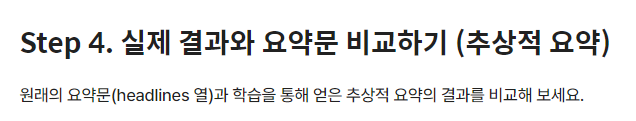

In [61]:
#BLEU평가지포를 활용
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# reference = [["this", "is", "a", "test"], ["this", "is" "test"]]
# candidate = ["this", "is", "a", "test"]
# score = sentence_bleu(reference, candidate)
# print(score)
for i in range(5):
    smoothie = SmoothingFunction().method4
    score = sentence_bleu(seq2text(encoder_input_test[i]),seq2summary(decoder_input_test[i]),smoothing_function=smoothie)
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print(f'성능 score:{score}')
    print("\n")

원문 : letter maharashtra cm devendra fadnavis shiv sena youth wing chief thackeray requested cities including mumbai allowed remain open night new year celebrations adding citizens given space time hours work thackeray said legal day cannot illegal night 
실제 요약 : let mumbai be open all night on new year thackeray 
예측 요약 :  mns chief proposes to provide free sena on sena
성능 score:0.012455673519915911


원문 : aerospace manufacturer pratt whitney paying compensation indigo glitches engines power airbus new neo planes president aditya ghosh said indigo forced ground nine jets recently continues high number engine sufficient available operational disruptions quite challenging happy added 
실제 요약 : indigo to get compensation from firm for faulty engines 
예측 요약 :  indigo recalls airline on fire over faulty crisis
성능 score:0.011359086734765178


원문 : un secretary general ant nio guterres selected malala yousafzai un messenger peace highest honour un chief global citizen un spokesperson friday ann

In [62]:
#ROUGE평가지표를 활용
#pip install rouge 모듈 설치
# 각 ROUGE 지표에 대한 F1-score, precision, recall 값을 반환합니다.
from rouge import Rouge 
rouge = Rouge()
for i in range(5):
    scores = rouge.get_scores(seq2text(encoder_input_test[i]),seq2summary(decoder_input_test[i]))
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print(f'성능 score:{scores}')
    print("\n")

원문 : letter maharashtra cm devendra fadnavis shiv sena youth wing chief thackeray requested cities including mumbai allowed remain open night new year celebrations adding citizens given space time hours work thackeray said legal day cannot illegal night 
실제 요약 : let mumbai be open all night on new year thackeray 
예측 요약 :  mns chief proposes to provide free sena on sena
성능 score:[{'rouge-1': {'r': 0.6, 'p': 0.17647058823529413, 'f': 0.27272726921487606}, 'rouge-2': {'r': 0.1111111111111111, 'p': 0.02857142857142857, 'f': 0.04545454220041345}, 'rouge-l': {'r': 0.6, 'p': 0.17647058823529413, 'f': 0.27272726921487606}}]


원문 : aerospace manufacturer pratt whitney paying compensation indigo glitches engines power airbus new neo planes president aditya ghosh said indigo forced ground nine jets recently continues high number engine sufficient available operational disruptions quite challenging happy added 
실제 요약 : indigo to get compensation from firm for faulty engines 
예측 요약 :  indigo recall

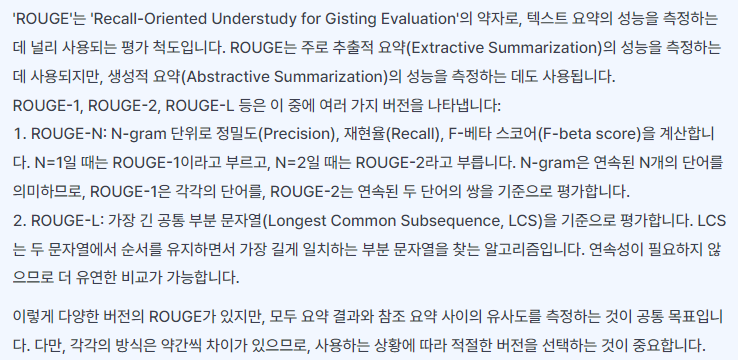

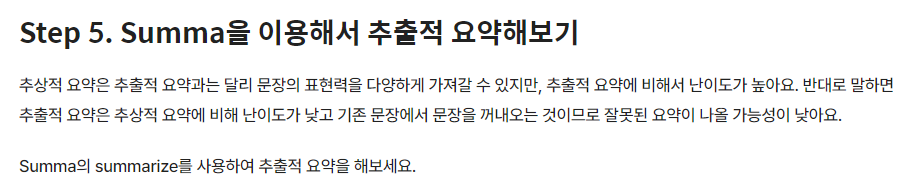

In [75]:
#summa패키지 설치 
#pip imstall summa
#데이터 다운로드
import requests
from summa.summarizer import summarize
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
summa_data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
print(summa_data[:1500])

                                              headlines  \
0     upGrad learner switches to career in ML & Al w...   
1     Delhi techie wins free food from Swiggy for on...   
2     New Zealand end Rohit Sharma-led India's 12-ma...   
3     Aegon life iTerm insurance plan helps customer...   
4     Have known Hirani for yrs, what if MeToo claim...   
...                                                 ...   
1495  Have seen Sachin Tendulkar get angry but not M...   
1496  Player ensures wife stays dry in rain during A...   
1497  Federer denied entry into locker room by secur...   
1498  42/42 seats in West Bengal: CM Mamata's cutout...   
1499  Court refuses chargesheet by Delhi Police agai...   

                                                   text  
0     Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1     Kunal Shah's credit card bill payment platform...  
2     New Zealand defeated India by 8 wickets in the...  
3     With Aegon Life iTerm Insurance plan, customer...  
4

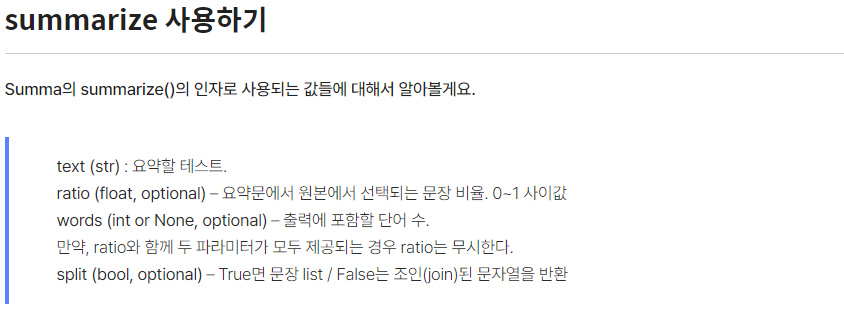

In [87]:
#summarize사용하기
# for i in range(5):
#     print('Summary:')
#     print(summarize(summa_data['text'][i])
    
# for i in range(5):
#     print('Summary:')
#     print(summarize(summa_data['text'][i], ratio=0.1))
# summa_data['summary'] = summa_data['text'].apply(lambda x: summarize(x, ratio=0.1))  # ratio 값을 높임

# print('Summary:')
# print(summa_data['summary'])
for i in range(5):
    summa_data1 = summa_data['text'][i]
    print(summa_data1)
#     print('Summary:')
    print(summarize(summa_data1, ratio=0.5))

Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
upGrad's Online Power Learning has powered 3 lakh+ careers.
Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
New Zealand defeated India by 8 wickets in the fourth ODI at Hamilto

In [81]:
summa_data['text'][i]

'Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I\'ve known Hirani for many years...What if it\'s not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment," she added. Hirani has been accused by an assistant who worked in \'Sanju\'.'